In [8]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
path = '../data/Norway/train/train'

# def load_dataset(path):
data = np.load(path+'_seismic.npy')
labels = np.load(path+'_labels.npy')

In [9]:
data.shape

(401, 701, 255)

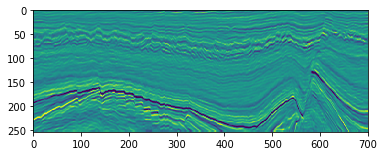

In [10]:
plt.imshow(data[0,:,:].transpose())
plt.show()

In [7]:
import scipy.io as sio

In [8]:
p = '/media/nvme/data/projects/LithONet/data/LANDMASS/LANDMASS1/chaotic/chaotic_0001.mat'
data = scipy.io.loadmat(p)

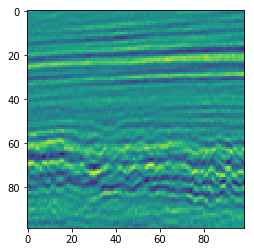

In [12]:
plt.imshow(data['img'])

In [21]:
dim=(128,128,128)
fx  = np.fromfile('/media/nvme/data/projects/LithONet/data/data2/validation/seis/10.dat',dtype=np.single)
fx = np.reshape(fx,dim)

In [22]:
fx.shape

(128, 128, 128)

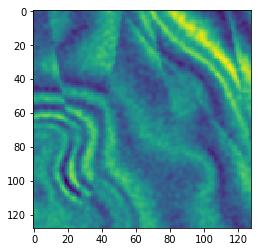

In [23]:
plt.imshow(fx[:,:,10])
plt.show()

In [1]:

from base import BaseDataSet, BaseDataLoader
from utils import palette
import numpy as np
import os
import scipy
import torch
from PIL import Image
import cv2
from torch.utils.data import Dataset
from torchvision import transforms

class NorwayDataset(BaseDataSet):
    def __init__(self, **kwargs):
        self.num_classes = 6
        self.palette = [0,0,255,255,0,0,0,255,0,255,255,255,255,0,255,0,255,255]
        super(NorwayDataset, self).__init__(**kwargs)

    def _set_files(self):
        if 'test' in self.split:
            self.root = os.path.join(self.root,'test_once','test1')
        elif 'val' in self.split:
            self.root = os.path.join(self.root,'test_once','test2')
        else:
            self.root = os.path.join(self.root,'train','train')
        self.files = np.load(self.root+'_seismic.npy')
        self.labels = np.load(self.root+'_labels.npy')
        self.files = np.load(self.root+'_seismic.npy')
        self.labels = np.load(self.root+'_labels.npy')
    
    def _load_data(self, index):
        return self.files[index], self.labela[index], str(index)

class NorwayAugDataset(BaseDataSet):
    def __init__(self, **kwargs):
        self.num_classes = 6
        self.palette = [0,0,255,255,0,0,0,255,0,255,255,255,255,0,255,0,255,255]
        super(NorwayAugDataset, self).__init__(**kwargs)

    def _set_files(self):
        if 'test' in self.split:
            self.root = os.path.join(self.root,'test_once','test1')
        elif 'val' in self.split:
            self.root = os.path.join(self.root,'test_once','test2')
        else:
            self.root = os.path.join(self.root,'train','train')
        self.files = np.load(self.root+'_seismic.npy')
        self.labels = np.load(self.root+'_labels.npy')
        self.files = np.load(self.root+'_seismic.npy')
        self.labels = np.load(self.root+'_labels.npy')
    
    def _load_data(self, index):
        return self.files[index].reshape((-1,-1,1)), self.labela[index], str(index)


class Norway(BaseDataLoader):
    def __init__(self, data_dir, batch_size, split, crop_size=None, base_size=None, scale=True, num_workers=1, val=False,
                    shuffle=False, flip=False, rotate=False, blur= False, augment=False, val_split= None, return_id=False):
        
        self.MEAN = [0]
        self.STD = [1.]

        kwargs = {
            'root': data_dir,
            'split': split,
            'mean': self.MEAN,
            'std': self.STD,
            'augment': augment,
            'crop_size': crop_size,
            'base_size': base_size,
            'scale': scale,
            'flip': flip,
            'blur': blur,
            'rotate': rotate,
            'return_id': return_id,
            'val': val
        }
    
        if split in ["train_aug", "trainval_aug", "val_aug", "test_aug"]:
            self.dataset = NorwayAugDataset(**kwargs)
        elif split in ["train", "trainval", "val", "test"]:
            self.dataset = NorwayDataset(**kwargs)
        else: 
            raise ValueError(f"Invalid split name {split}")
        super(NorwayDataLoader, self).__init__(self.dataset, batch_size, shuffle, num_workers, val_split)



/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [1]:
import os
import json
import argparse
import torch
import dataloaders
import models
import inspect
import math
from utils import losses
from utils import Logger
from utils.torchsummary import summary
from trainer import Trainer

def get_instance(module, name, config, *args):
    # GET THE CORRESPONDING CLASS / FCT 
    return getattr(module, config[name]['type'])(*args, **config[name]['args'])
    
config = json.load(open('config.json'))
# DATA LOADERS
train_loader = get_instance(dataloaders, 'train_loader', config)
val_loader = get_instance(dataloaders, 'val_loader', config)


/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
batch = train_loader.

TypeError: 'Norway' object does not support indexing